<a href="https://colab.research.google.com/github/restiso7788/Linear_Regression_CellBox/blob/main/comparsion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import ast 
from matplotlib.lines import Line2D
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("/content/expert.csv")
#remove the index column
df =df.iloc[:,1:]
df929 = pd.read_csv("/content/random_partition_average_testhat_929.csv")
df929 = df929.iloc[:,1:]

In [ ]:
new_df = pd.DataFrame()
for _ in range(1000):
  Y = df.iloc[:,:-12]
  X = df.iloc[:,-12:]
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3)
  lr = LinearRegression().fit(X_train, Y_train)
  y_hat = lr.predict(X_test)
  y_hat = pd.DataFrame(y_hat)
  #df = df.reindex(np.random.permutation(df.index))
  y_hat.index = X_test.index
  new_df = pd.concat([new_df, y_hat],axis = 0)
print(new_df.shape)

df2 = new_df.groupby(new_df.index).mean()
df2.head()

(27000, 87)


,0,1,2,3,4,5,6,7,8,9,...,77,78,79,80,81,82,83,84,85,86
0,-0.322445,-0.586341,-0.772930,-0.553951,-0.046976,-0.121943,0.111569,0.033958,0.402401,0.462835,...,-0.103575,0.007559,0.134415,0.067056,0.189398,0.031940,0.450627,0.002452,0.026161,0.187259
1,-0.444694,-0.504332,-0.997343,-0.491016,-0.189736,0.054832,0.124520,0.044228,0.103073,0.577800,...,-0.120944,0.009563,0.207592,-0.054560,0.052315,-0.029427,0.365697,1.489735,-0.125129,0.291188
2,-0.451063,-0.619969,-0.874983,-0.621331,-0.173732,-0.070704,0.023002,0.021037,0.246623,0.412158,...,-0.064786,0.002432,0.077234,0.044581,0.239896,0.216004,0.380875,0.159626,0.079566,0.255892
3,-0.282276,-0.652577,-0.925440,-0.561105,-0.058889,-0.115820,0.068448,0.133110,0.230487,0.436426,...,-0.072032,-0.016177,0.093191,0.058058,0.184374,0.206585,0.426997,0.056261,0.046760,0.469388
4,-0.370929,-0.855759,-1.342976,-1.106763,-0.110386,-0.223425,0.312721,0.299967,0.410960,0.573712,...,-0.041412,0.010767,0.193741,0.074955,0.287985,-0.155198,0.679030,-0.020818,-0.002264,0.662311


In [ ]:
x = df.iloc[:,-12:]

In [ ]:
df2 = pd.concat([df2,x],axis = 1, join = "inner")
df2.shape

(89, 99)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Correlation between linear regression and CellBox across all conditions')

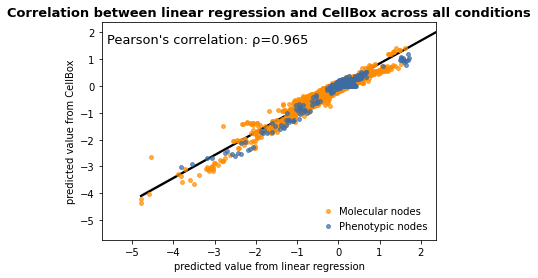

In [ ]:
x_all = df2.values.flatten()
y_all = df929.values.flatten()

x_prot = df2.iloc[:,0:82]
y_prot = df929.iloc[:,0:82]
x_pheno = df2.iloc[:,82:87]
y_pheno = df929.iloc[:,82:87]
plt.scatter(x_prot, y_prot, s = 15, alpha = 0.7, color="darkorange",zorder=3)

plt.scatter(x_pheno, y_pheno, s = 15, alpha = 0.7, color="#3D6CA3",zorder=4)

plt.legend(["Molecular nodes","Phenotypic nodes"], loc="lower right", frameon=False,
          handletextpad=0.1)
plt.plot([-10, 10], [-10, 10], c = 'white', alpha = 0, ls = '--')

#sns.regplot(x_all, y_all, scatter_kws={'s': 15, 'alpha': 0},line_kws={'color': 'orange', 'alpha': 1})
sns.regplot(x_all, y_all, scatter_kws={'s': 15, 'alpha': 0},line_kws={'color': 'black', 'alpha': 1})

plt.xticks(np.arange(-6,3))
plt.yticks(np.arange(-6,3))


lower = np.min([x_all, y_all])
upper = np.max([x_all, y_all])
plt.xlim([lower*1.2, upper*0.9])
plt.ylim([lower*1.2, upper*0.9])

r = np.corrcoef(x_all, y_all)[0][1]
plt.text(x = -5.6, y= 1.6, s='Pearson\'s correlation: ρ=%1.3f'%r,
        size = 13)
plt.xlabel('predicted value from linear regression')
plt.ylabel('predicted value from CellBox')
plt.title("Correlation between linear regression and CellBox across all conditions", 
          weight='bold', size=13)
